In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


# Step 1: Load and Explore the Dataset


In [4]:
# Load the dataset
df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")
# display first five rows the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Check for Missing Values & Data Types

In [5]:
missing_values = df.isnull().sum()
print("Missing Values in Each Columns:\n", missing_values)

Missing Values in Each Columns:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


**There are no null values in this dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
print(f"The dataset Contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataset Contains 10000 rows and 14 columns


In [8]:
# Generate the summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Check Unique Values for Categorical Columns
- Geography
- Gender

In [9]:
print("Unique Values in Geography: ", df['Geography'].unique())
print("Unique Values in Gender: ", df['Gender'].unique())

Unique Values in Geography:  ['France' 'Spain' 'Germany']
Unique Values in Gender:  ['Female' 'Male']


### Data Visualization

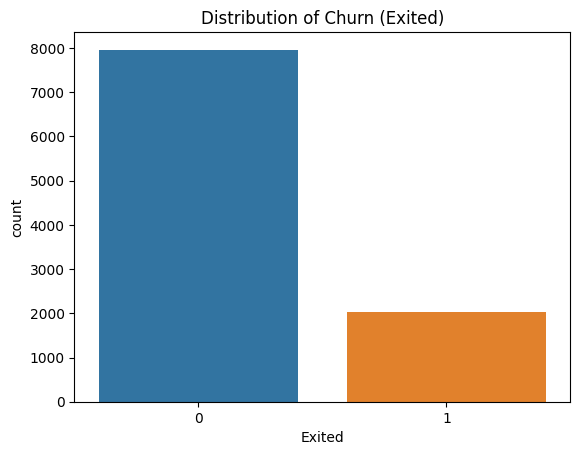

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Exited', data=df)  # Adjust column name as needed
plt.title('Distribution of Churn (Exited)')
plt.show()


**The plot here shows that there is class Imbalance. Class 0 (non-churn) has majority of data**

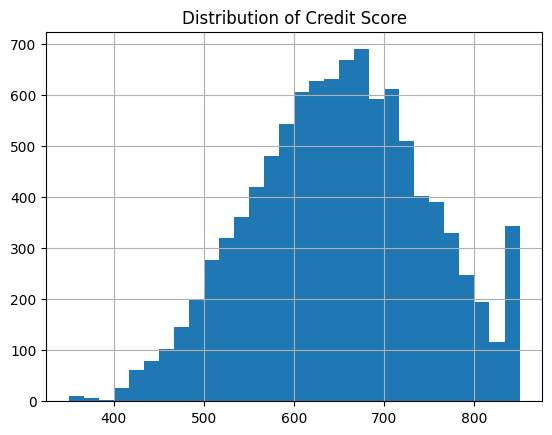

In [11]:
df['CreditScore'].hist(bins=30)
plt.title('Distribution of Credit Score')
plt.show()


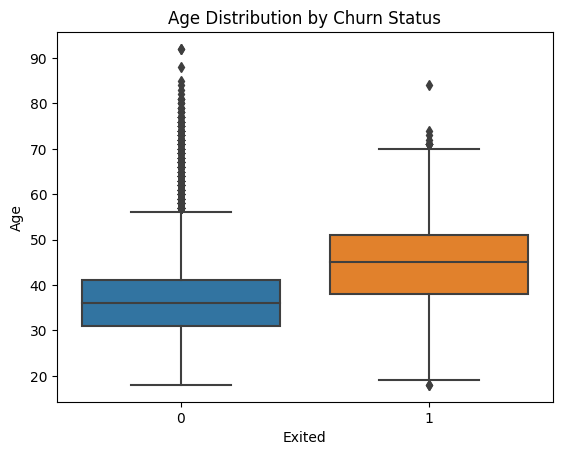

In [12]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age Distribution by Churn Status')
plt.show()


# Step 2: Data Preprocessing

### Drop Unnecessary Columns

In [13]:
# Features like RowNumber, CustomerId, Surname does not contribute in the prediction so, we will remove these columns

df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encode Categorical Variable

In [15]:
# Convert categorical variable into numerical using One-Hot encoding

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# map Gender column to binary 'Female' as 0 and 'Male' as 1
df['Gender'] = df['Gender'].map({'Female' : 0, 'Male': 1})

In [16]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


# Step 3: Feature Scaling and Data Splitting

### Split the data into train-test

In [17]:
from sklearn.model_selection import train_test_split

# Define feature variable X by removing target variable
X = df.drop(columns=['Exited'])
y = df['Exited'] # target

# split dataset in train-test (80-20) using stratify so that the train-test data has same proportion of target variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape

((8000, 11), (2000, 11))

### Feature Scaling (Standardization)

**Feature scaling should be performed after we split the dataset in train-test so that there is no data leakage**

In [18]:
from sklearn.preprocessing import StandardScaler

# list numerical columns to scale

num_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

scaler = StandardScaler()

# fit and transform on training data, transform on test data to prevent data leakage

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [19]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
2151,1.058568,1,1.715086,0.684723,-1.226059,-0.910256,1,0,1.042084,False,False
8392,0.913626,1,-0.659935,-0.696202,0.413288,-0.910256,1,0,-0.623556,True,False
5006,1.079274,0,-0.184931,-1.731895,0.601687,0.808830,1,1,0.308128,True,False
4117,-0.929207,1,-0.184931,-0.005739,-1.226059,0.808830,1,0,-0.290199,False,False
7182,0.427035,1,0.955079,0.339492,0.548318,0.808830,0,1,0.135042,True,False


# Step 4: Model Selection and Training

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression Model
lr_model = LogisticRegression()

# train the model
lr_model.fit(X_train, y_train)

# Predict On the test set

y_pred = lr_model.predict(X_test)

# Evaluate the Model

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.808
Confusion Matrix:
 [[1540   53]
 [ 331   76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



**The row recall for '1' here indicates that the model is missing a lot of churned customers**

### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8615
Confusion Matrix:
 [[1538   55]
 [ 222  185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



**The row recall for '1' here indicates that the model is missing a lot of churned customers**
- In the case of churned prediction, low recall means that model missed too many churned customer which could lead to missed opportunities for customer rentention.

### XGBoost


In [22]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


XGBoost Accuracy: 0.853
Confusion Matrix:
 [[1506   87]
 [ 207  200]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.49      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



# Step 5: Model Evaluation and Hyperparameter Tuning

### GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.867
Confusion Matrix:
 [[1547   46]
 [ 220  187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.80      0.46      0.58       407

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



# Step 6: Class Balancing

### SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_res))



Original class distribution: Counter({0: 6370, 1: 1630})
Resampled class distribution: Counter({1: 6370, 0: 6370})


In [26]:
# Initialize RandomForest model
rf_model_res = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the resampled data
rf_model_res.fit(X_train_res, y_train_res)

# Make predictions
y_pred_rf_res = rf_model_res.predict(X_test)

# Evaluate the model
accuracy_res = accuracy_score(y_test, y_pred_rf_res)
conf_matrix_res = confusion_matrix(y_test, y_pred_rf_res)
class_report_res = classification_report(y_test, y_pred_rf_res)

print("Random Forest Accuracy after SMOTE:", accuracy_res)
print("Confusion Matrix after SMOTE:\n", conf_matrix_res)
print("Classification Report after SMOTE:\n", class_report_res)

Random Forest Accuracy after SMOTE: 0.8385
Confusion Matrix after SMOTE:
 [[1435  158]
 [ 165  242]]
Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.60      0.59      0.60       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [27]:
# Train the XGBoost model on the resampled data
xgb_model_res = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model_res.fit(X_train_res, y_train_res)

# Make predictions
y_pred_xgb_res = xgb_model_res.predict(X_test)

# Evaluate the model
accuracy_res = accuracy_score(y_test, y_pred_xgb_res)
conf_matrix_res = confusion_matrix(y_test, y_pred_xgb_res)
class_report_res = classification_report(y_test, y_pred_xgb_res)

print("XGBoost Accuracy after SMOTE:", accuracy_res)
print("Confusion Matrix after SMOTE:\n", conf_matrix_res)
print("Classification Report after SMOTE:\n", class_report_res)

XGBoost Accuracy after SMOTE: 0.8465
Confusion Matrix after SMOTE:
 [[1464  129]
 [ 178  229]]
Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      1593
           1       0.64      0.56      0.60       407

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000



### Hyperparameter Tuning 

In [28]:
# Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [29]:
# Use the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.841
Confusion Matrix:
 [[1436  157]
 [ 161  246]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.60      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



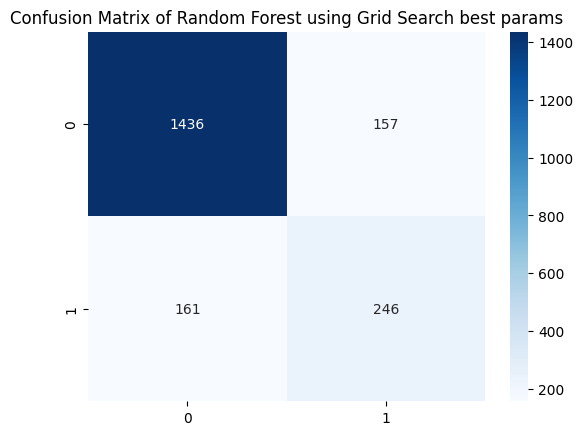

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Random Forest using Grid Search best params')
plt.show()


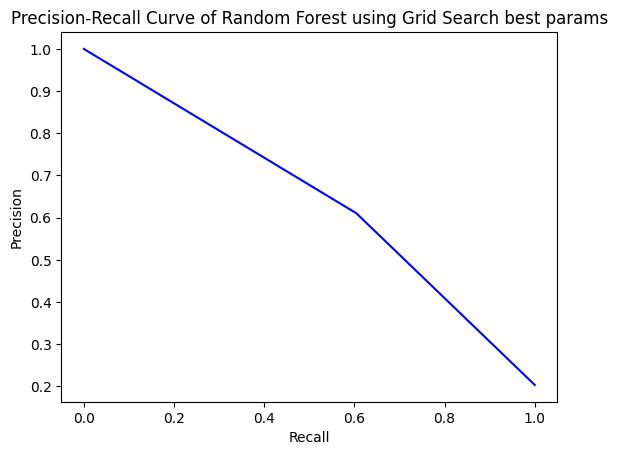

In [31]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, color='blue')
plt.title('Precision-Recall Curve of Random Forest using Grid Search best params')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


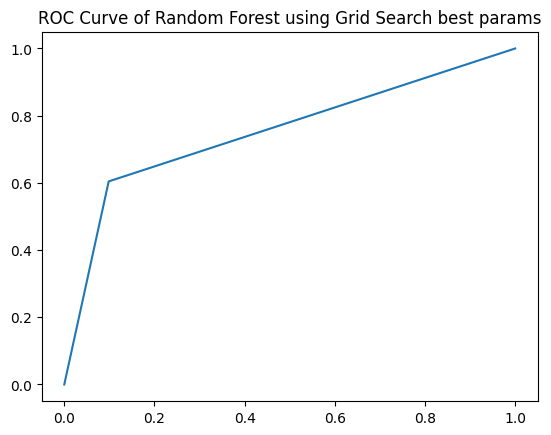

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.title('ROC Curve of Random Forest using Grid Search best params')
plt.show()


### Adjusting Threshold

In [33]:
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba > 0.4).astype(int)  # Adjusting threshold to 0.4

print("Adjusted Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("Adjusted Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("Adjusted Classification Report:\n", classification_report(y_test, y_pred_adjusted))


Adjusted Accuracy: 0.808
Adjusted Confusion Matrix:
 [[1333  260]
 [ 124  283]]
Adjusted Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      1593
           1       0.52      0.70      0.60       407

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.73      2000
weighted avg       0.83      0.81      0.82      2000



### Visualization of results

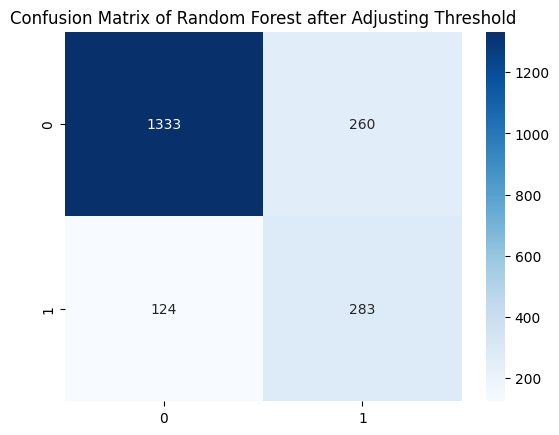

In [34]:
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Random Forest after Adjusting Threshold')
plt.show()


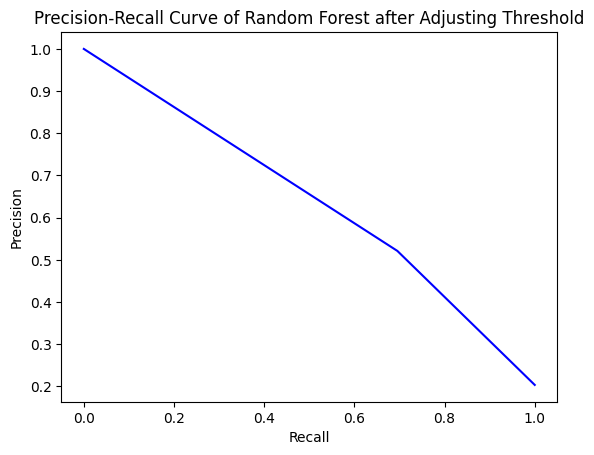

In [35]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_adjusted)

plt.plot(recall, precision, color='blue')
plt.title('Precision-Recall Curve of Random Forest after Adjusting Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


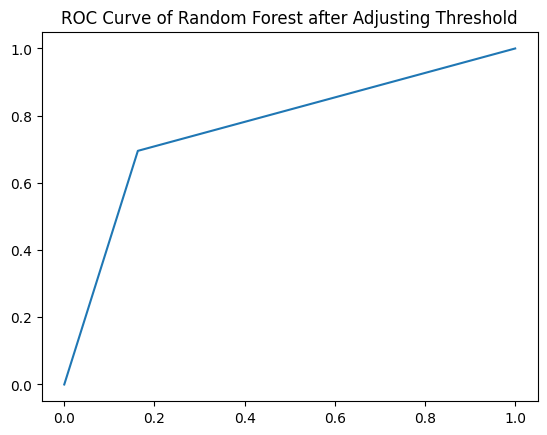

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_adjusted)
auc = roc_auc_score(y_test, y_pred_adjusted)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.title('ROC Curve of Random Forest after Adjusting Threshold')
plt.show()


# Key Takeaways and Findings

Class Imbalance
- The dataset has class imbalance with significantly more non-churned customers than churned.
  
Model Performance Summary
- Logistic Regression:  accuracy of 80.8% but a very low recall of 0.19 for churned (Exited)
- Random Forest:  accuracy of 86.15 but still has a low recall of 0.45 for churned class but it is significantly better than logistic regression
- XGBoost:  accuracy of 85.3 but has a low recall of 0.49 for churned class but it is better than Random Forest.

Model Performance After HyperParameter Tuning
- Random Forest Performed better, so we used GridSearchCV to perform hyperparameter Tuning for this model
- The accuracy for tuned Random Forest is 86.7 and churned class recall is 0.46

Handling Class Imbalance and Tuning
- The dataset has class imbalance which can be the reason for low recall for churned class so we used the techniques to handle class imbalance.
- SMOTE is used to handle class imbalance.
- SMOTE improved the recall for the minority class (Churned) to 0.59 with slightly lower precision
- SMOTE did improve recall for XGBoost too but Random Forest outperforms XGBoost.
- Performing hyperparameter tuning after SMOTE does not make any significant difference.

Adjusting Threshold
- Adjusted the threshold to 0.4 which helps balance precision and recall but with a trade-off in overall accuracy.
- The recall for the minority class is 0.70 which means that it will predict more churned(Exited) class correctly but comes with a trade-off which means non-churned(Exited=0) may also be predicted Churned.

Summary
- If the company has significant loss or does not want to lose customers, then recall is important but if retaining customers costs a huge amount then a false positive can lead to more cost to the company.
- The precision-recall tradeoff depends on what the company will benefit from. If getting a new customer is costly than retaining the old customer then recall is important and vice-versa.

# Neural Network Model

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight

# Split into train (70%), validation (15%), test (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

# Scaling (Standardization)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1], )),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # binary classification
])
# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train model
history = model.fit(X_train_resampled, y_train_resampled, 
                    validation_data=(X_val, y_val), epochs=50, 
                    batch_size=32, verbose=1)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7204 - loss: 0.5559 - val_accuracy: 0.7773 - val_loss: 0.4832
Epoch 2/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7859 - loss: 0.4676 - val_accuracy: 0.7967 - val_loss: 0.4488
Epoch 3/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8120 - loss: 0.4178 - val_accuracy: 0.8047 - val_loss: 0.4371
Epoch 4/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8138 - loss: 0.4176 - val_accuracy: 0.8040 - val_loss: 0.4211
Epoch 5/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8198 - loss: 0.4068 - val_accuracy: 0.8120 - val_loss: 0.4278
Epoch 6/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8190 - loss: 0.4021 - val_accuracy: 0.8067 - val_loss: 0.4231
Epoch 7/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8213 - loss: 0.3959 - val_accuracy: 0.8167 - val_loss: 0.4097
Epoch 8/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8279 - loss: 0.3972 - val_accuracy: 0.8180 - val_

[](http://)

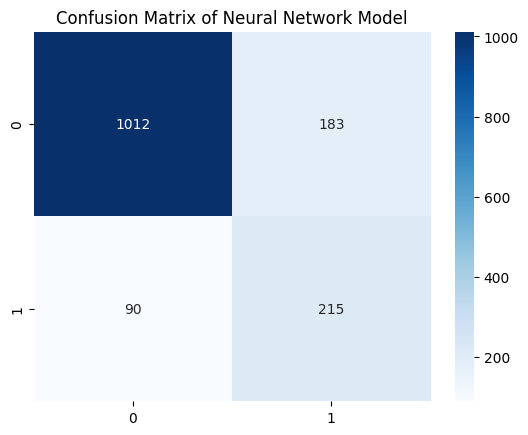

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Neural Network Model')
plt.show()


# Summary of Result of Neural Network Model

- Applied SMOTE to address class balance, as the model was initially ignoring minority class.
- After SMOTE, the model gives almost the same result as Random Forest after SMOTE and Threshold Adjustment
- Model is trained faster as the data is tabular and relatively smaller size for the neural network model
- Accuracy: 81.8
- Recall: 0.70 and Precision: 0.54 (for Minority class i.e Exited=1)